In [121]:
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np
from sklearn import linear_model
%matplotlib inline
pd.options.display.float_format = '{:.3f}'.format

# Suppress annoying harmless error.
import warnings
warnings.filterwarnings(action="ignore", module="scipy", message="^internal gelsd")

In [122]:
df= pd.read_csv('/Users/markespina/Downloads/NEW_YORK-Offenses_Known_to_Law_Enforcement_by_City_2013_13tbl8ny.csv')

In [123]:
df.columns= list(df.iloc[3])
df= df.iloc[4:]

In [124]:
df.columns=['City', 'Population', 'Violent_crime',
       'Murder_manslaughter',
       'Rape_ver1', 'Rape_ver2',
       'Robbery', 'Aggravated_assault', 'Property_crime', 'Burglary',
       'Larceny_theft', 'auto_theft', 'Arson3']

In [125]:
df=df.drop(labels="Rape_ver1", axis=1)

In [126]:
df.City

4                                          Adams Village
5                               Addison Town and Village
6                                          Akron Village
7                                                 Albany
8                                         Albion Village
9                                         Alfred Village
10                                      Allegany Village
11                                          Amherst Town
12                                    Amityville Village
13                                             Amsterdam
14                                        Arcade Village
15                                       Ardsley Village
16                                     Asharoken Village
17                                        Attica Village
18                                                Auburn
19                                          Avon Village
20                                 Baldwinsville Village
21                             

In [127]:
df= df.reset_index().drop('index', axis=1)

In [128]:
df=df[:348]
df.Arson3.fillna(0, inplace=True)

In [129]:
df.head()

,City,Population,Violent_crime,Murder_manslaughter,Rape_ver2,Robbery,Aggravated_assault,Property_crime,Burglary,Larceny_theft,auto_theft,Arson3
0,Adams Village,"1,861",0,0,0,0,0,12,2,10,0,0
1,Addison Town and Village,"2,577",3,0,0,0,3,24,3,20,1,0
2,Akron Village,"2,846",3,0,0,0,3,16,1,15,0,0
3,Albany,"97,956",791,8,30,227,526,"4,090",705,"3,243",142,0
4,Albion Village,"6,388",23,0,3,4,16,223,53,165,5,0


In [130]:
df.corr()

""


## Propertycrime=α+Population+Population2+Murder+Robbery


In [131]:
df["Population"]=df.Population.str.replace(',', "").astype(int)

df['Population2']=df['Population']**2

In [132]:
for col in ['Violent_crime', 'Murder_manslaughter','Rape_ver2', 'Robbery', 'Aggravated_assault', 'Property_crime'\
       , 'Burglary', 'Larceny_theft', 'auto_theft']:
    df[col]= df[col].str.replace(',',"").astype(int)

In [133]:
'''for col in ['']:
    df[col] =df[col].apply(lambda x: x if x==0 else 1)'''

"for col in ['']:\n    df[col] =df[col].apply(lambda x: x if x==0 else 1)"

In [134]:
df2=df[['Population','Population2','Violent_crime', 'Murder_manslaughter','Rape_ver2', 'Robbery', 'Aggravated_assault', 'Property_crime'\
       , 'Burglary', 'Larceny_theft', 'auto_theft']]

In [135]:
# vars are all Highly correlated, combined similar cimes via stardization
df2.corr()

,Population,Population2,Violent_crime,Murder_manslaughter,Rape_ver2,Robbery,Aggravated_assault,Property_crime,Burglary,Larceny_theft,auto_theft
Population,1.000,0.998,0.999,0.987,0.991,0.998,0.999,0.996,0.971,0.998,0.992
Population2,0.998,1.000,0.997,0.980,0.984,0.996,0.997,0.991,0.959,0.994,0.986
Violent_crime,0.999,0.997,1.000,0.992,0.995,1.000,1.000,0.998,0.978,0.999,0.996
Murder_manslaughter,0.987,0.980,0.992,1.000,0.998,0.993,0.991,0.995,0.994,0.993,0.998
Rape_ver2,0.991,0.984,0.995,0.998,1.000,0.995,0.994,0.998,0.992,0.996,0.999
Robbery,0.998,0.996,1.000,0.993,0.995,1.000,1.000,0.998,0.980,0.999,0.997
Aggravated_assault,0.999,0.997,1.000,0.991,0.994,1.000,1.000,0.998,0.976,0.999,0.995
Property_crime,0.996,0.991,0.998,0.995,0.998,0.998,0.998,1.000,0.987,1.000,0.998
Burglary,0.971,0.959,0.978,0.994,0.992,0.980,0.976,0.987,1.000,0.983,0.991
Larceny_theft,0.998,0.994,0.999,0.993,0.996,0.999,0.999,1.000,0.983,1.000,0.997


In [136]:
# group features for pca
violent_crimes=['Violent_crime', 'Murder_manslaughter','Rape_ver2', 'Aggravated_assault']

thefts=['Burglary', 'Larceny_theft', 'auto_theft']
aggr_features=[[violent_crimes, 'violent_crime'], [thefts, 'theft']]

In [137]:
#reduce features
for group in aggr_features:
    means = df[group[0]].mean(axis=0)
    stds = df[group[0]].std(axis=0)
    df[group[1]]=((df[group[0]] - means) / stds).mean(axis=1)


In [138]:
df.head()

,City,Population,Violent_crime,Murder_manslaughter,Rape_ver2,Robbery,Aggravated_assault,Property_crime,Burglary,Larceny_theft,auto_theft,Arson3,Population2,violent_crime,theft
0,Adams Village,1861,0,0,0,0,0,12,2,10,0,0,3463321,-0.081,-0.105
1,Addison Town and Village,2577,3,0,0,0,3,24,3,20,1,0,6640929,-0.081,-0.103
2,Akron Village,2846,3,0,0,0,3,16,1,15,0,0,8099716,-0.081,-0.105
3,Albany,97956,791,8,30,227,526,4090,705,3243,142,0,9595377936,0.299,0.435
4,Albion Village,6388,23,0,3,4,16,223,53,165,5,0,40806544,-0.065,-0.074


In [139]:
X= df[['Population' , 'Population2', 'violent_crime',
       'theft']]

In [140]:
X.theft.unique()

array([-1.05012758e-01, -1.03300856e-01, -1.05110508e-01,  4.35480450e-01,
       -7.43605163e-02, -1.00764038e-01, -1.05733519e-01,  9.25532263e-02,
       -8.56602272e-02, -4.29021274e-02, -1.02512965e-01, -1.02520267e-01,
       -1.06153728e-01, -1.05222415e-01, -1.58597129e-02, -1.02474595e-01,
       -9.77842079e-02, -9.63956608e-02, -4.36402476e-02, -8.48274941e-02,
       -8.77392973e-02, -6.45546033e-02,  2.22851330e-01, -1.04907706e-01,
       -8.94854698e-02, -1.05432967e-01, -1.03766737e-01, -1.03361133e-01,
       -1.00312314e-01, -1.04652378e-01, -1.05373139e-01,  7.74274640e-04,
       -8.55692651e-02, -9.99295785e-02,  2.35486860e+00, -1.05163034e-01,
       -9.94796467e-02, -1.02611163e-01, -7.30282789e-02, -6.68990586e-02,
       -9.98706465e-02, -1.04704904e-01, -9.69058690e-02, -7.93515221e-02,
       -1.04915008e-01, -9.86392295e-02, -1.06048675e-01, -9.94654904e-02,
       -1.00899261e-01, -1.00080303e-01, -1.03038674e-01,  1.97676190e-01,
       -1.02174940e-01, -

In [141]:
y=df['Property_crime']

In [142]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()

In [143]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, random_state=10)

In [144]:
lr.fit(X_train, y_train)
lr.score(X_test, y_test)

0.9652924829740417

In [145]:
lr.coef_

array([ 7.23431852e-03,  1.56382318e-10, -2.50986309e+03,  6.36403346e+03])

In [146]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, mean_squared_log_error 

In [147]:
y_pred = lr.predict(X_test)

In [148]:
mean_absolute_error(y_test,y_pred)

72.78679232739599

In [149]:
mean_squared_error(y_test, y_pred)

22072.69980977698

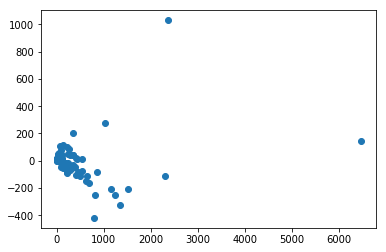

In [150]:
plt.scatter(y_test, y_pred-y_test)

In [151]:
def adj_r2(X, y, r2):
    return 1 - (1-r2)*(len(y)-1)/(len(y)-X.shape[1]-1)

In [152]:
adj_r2(X_test, y_test, lr.score(X_test, y_test))

0.9635994333630193

In [153]:
lr.score(X_test, y_test)

0.9652924829740417

**import statsmodels.formula.api as sm result = sm.ols(formula="AverageNumberofTickets ~ NumberofEmployees + ValueofContract", data=df).fit() #print result.summary() print result.rsquared, result.rsquared_adj # 0.877643371323 0.863248473832**

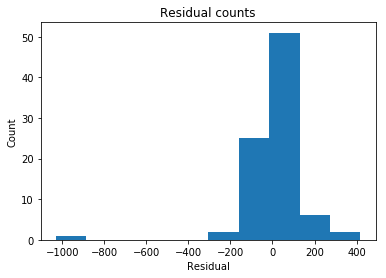

In [154]:
# Looks fairly normally distributed
predicted = lr.predict(X_test).ravel()
actual = y_test

# Calculate the error, also called the residual.
residual = actual - predicted

# This looks a bit concerning.
plt.hist(residual)
plt.title('Residual counts')
plt.xlabel('Residual')
plt.ylabel('Count')
plt.show()

In [155]:
from sklearn.model_selection import cross_val_score
cross_val_score(lr, X_test, y_test, cv=10)

array([ 0.92407579, -0.31810449,  0.1070072 ,  0.95780046, -0.50173725,
        0.92219207,  0.9610564 ,  0.62110638,  0.82901192,  0.98010325])

In [156]:
X

,Population,Population2,violent_crime,theft
0,1861,3463321,-0.081,-0.105
1,2577,6640929,-0.081,-0.103
2,2846,8099716,-0.081,-0.105
3,97956,9595377936,0.299,0.435
4,6388,40806544,-0.065,-0.074
5,4089,16719921,-0.081,-0.101
6,1781,3171961,-0.081,-0.106
7,118296,13993943616,-0.019,0.093
8,9519,90611361,-0.072,-0.086
9,18182,330585124,-0.076,-0.043
